In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from PIL import Image
from sklearn.cluster import KMeans

In [2]:
def central_value(value):
  if value%2==0:
    return int(value/2)
  else:
    return int(value/2)+1

In [3]:
def find_descriptors(curves):
  fcoeffs = []
  for cve in curves:
    fcoeffs.append(np.fft.fft(cve))
  descriptors = []
  for cvecoeff in fcoeffs:
    dim= cvecoeff.shape
    mid = central_value(dim[0])
    descriptors.append(np.abs(cvecoeff[mid:dim[0]])/np.sum(np.abs(cvecoeff[mid:dim[0]])))
  return np.array(descriptors)

In [5]:
data = np.load('shapes.npy')
shape_= data.shape
data1 = np.load('new_shape.npy')

In [8]:
curves = []
for i in range(shape_[0]):
  curves.append(data[i,:,0]+data[i,:,1]*1.0j)

Finding Fourier Descriptors

In [10]:
fdescriptors = find_descriptors(curves)

Creating a clusters, classes

In [11]:
kmeans = KMeans(n_clusters=5, random_state=0, n_init="auto").fit(fdescriptors)

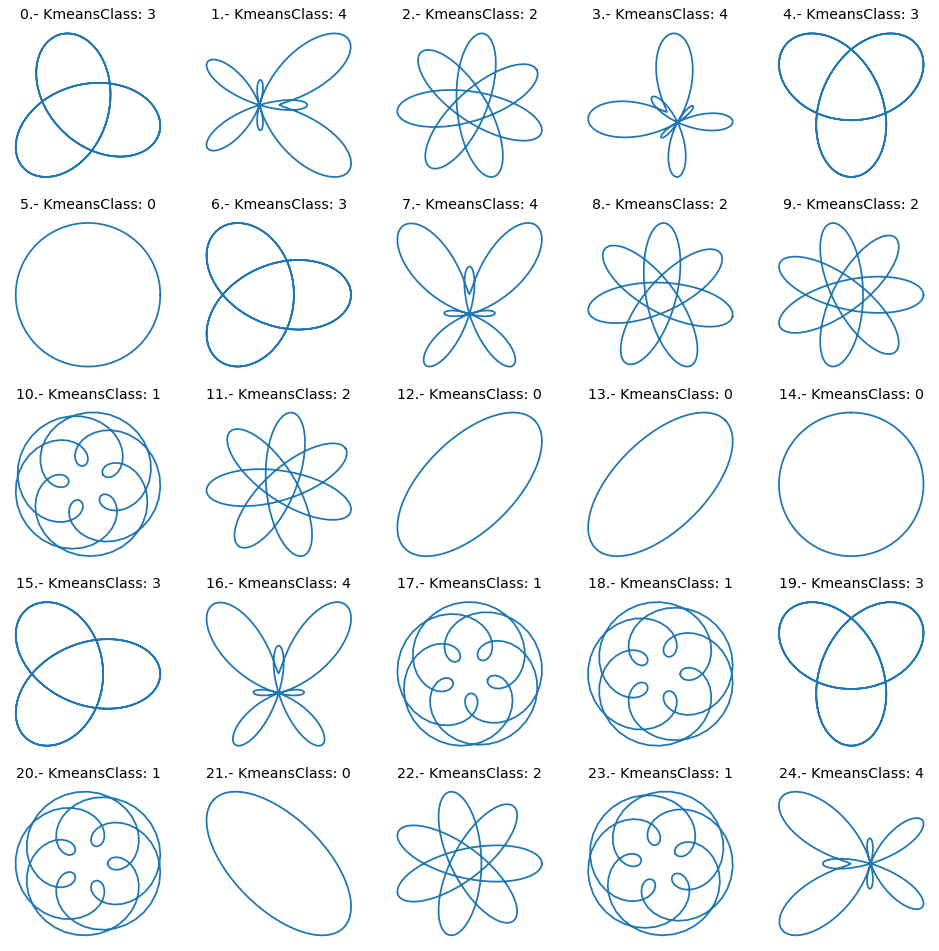

In [12]:
figure(figsize=(14,14), dpi=85)
for i in range(shape_[0]):
  plt.subplot(5,5,i+1)
  plt.plot(data[i,:,0],data[i,:,1]),
  plt.title(str(i)+".-"+" KmeansClass: "+str(kmeans.labels_[i]))
  plt.axis('off')
plt.show()

Curve to predict.

In [13]:
curv = []
curv.append(data1[:,0]+data1[:,1]*1.0j)
fdescriptor = find_descriptors(curv)

In [14]:
pred = kmeans.predict(fdescriptor)

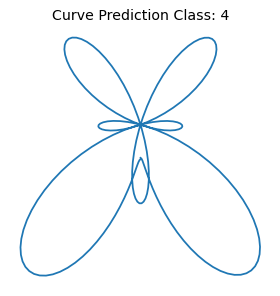

In [15]:
figure(figsize=(4,4), dpi=85)
plt.plot(data1[:,0],data1[:,1]),plt.title("Curve Prediction Class: "+str(pred[0]))
plt.axis('off')
plt.show()

Hence the fourier descriptors are invariant with rigid and scale transformation we have a perfect clasification.